# 0- Introdução

# Autor: Adilson Albino Pereira

O estudo/análise abaixo foi realizado utilizando os dados do setor de RH da empresa norte americana IBM disponibilizados gratuitamente no site www.kaggle.com.

Minha motivação é entender o perfil das pessoas que acabam deixando a empresa. Essa informação pode ser importante para ajudar ou evitar/previnir demissões em massa, diminuir custos operacionais desnecessários a fim de melhorar o índice de satisfação dos funcionários, que consequêntemente poderia aumentar a produtividade na empresa.

Perguntas que vou buscar responder com esses dados:
- Existe uma disparidade salarial entre homens e mulheres?
- Existe alguma evidência de que o gênero tenha algum impacto entre funcionário e empresa
- Qual é a relação entre salário e departamento em que o funcionário atua?

...

Fonte dos dados: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# 1- Carregando Bibliotecas

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2- Carregando Dataset

In [2]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

O método (display()) faz um agrupamento das funções (head(), tail() e shape). Ao inves de usar cada função de forma indiviadual, com o (display()) conseguimos reduzir tempo e obter o resultado de das 3 funções em apenas uma execução... Pois o mesmo apresenta os 5 primeiros registros do dataframe (head()), apresenta os 5 últimos registros do datafram (tail()) e apresenta no final a quantidade de linhas e colunas do dataframe (shape).

In [3]:
display(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


-Removendo algumas colunas que não farão parte da nossa análise:

In [4]:
df = df.drop(df[['DailyRate','HourlyRate','MonthlyRate','StandardHours','WorkLifeBalance',
                 'PercentSalaryHike', 'JobInvolvement','OverTime','PerformanceRating','EmployeeCount',
                 'RelationshipSatisfaction','TotalWorkingYears','TrainingTimesLastYear']],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EmployeeNumber           1470 non-null   int64 
 8   EnvironmentSatisfaction  1470 non-null   int64 
 9   Gender                   1470 non-null   object
 10  JobLevel                 1470 non-null   int64 
 11  JobRole                  1470 non-null   object
 12  JobSatisfaction          1470 non-null   int64 
 13  MaritalStatus            1470 non-null   object
 14  MonthlyIncome            1470 non-null  

In [6]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
StockOptionLevel           0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

A função describe() apresenta de forma simples e rápida, um conjunto de estatísticas descritivas como: a quantidade de valores, a média, o desvio padrão, o valor mínimo, os quartis da distribuição e o valor máximo. Uma atenção que deve ser levado em consideração, é que, essa função trabalha apenas com colunas que possui dados numéricos.

In [7]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.063946,2.728571,6502.931293,2.693197,0.793878,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,1.106940,1.102846,4707.956783,2.498009,0.852077,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,1.000000,2.000000,2911.000000,1.000000,0.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,2.000000,3.000000,4919.000000,2.000000,1.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,4.000000,8379.000000,4.000000,1.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,3.000000,40.000000,18.000000,15.000000,17.000000


Ao analisar os resultado do método (describe) podemos verificar que temos na coluna 'MonthlyIncome' que representa o salácio nesse conjunto de dados, temos como valor máximo (19999) podendo se tratar de um erro de digitação que estaria afetando diretamente a média, pois podemos notar ainda que a média e o desvio padrão têm uma distância considerável que vale olhar mais de perto diferente das outras colunas do dataframe.

In [8]:
df_groupby = df.groupby('Department').describe()
df_groupby.T

Department                  Human Resources  Research & Development  \
Age                  count        63.000000              961.000000   
                     mean         37.809524               37.042664   
                     std           9.226290                9.178964   
                     min          19.000000               18.000000   
                     25%          30.500000               30.000000   
...                                     ...                     ...   
YearsWithCurrManager min           0.000000                0.000000   
                     25%           2.000000                2.000000   
                     50%           3.000000                3.000000   
                     75%           6.500000                7.000000   
                     max          10.000000               17.000000   

Department                       Sales  
Age                  count  446.000000  
                     mean    36.542601  
                     std      9.032611  
                     min     18.000000  
                     25%     30.000000  
...                                ...  
YearsWithCurrManager min      0.000000  
                     25%      2.000000  
                     50%      3.000000  
                     75%      7.000000  
                     max     17.000000  

[112 rows x 3 columns]

# 3- Análise UniVariável

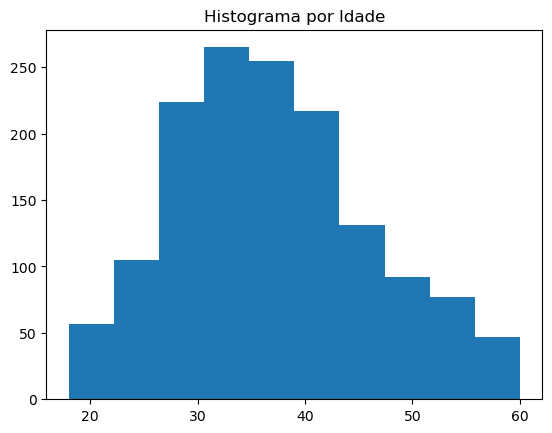

In [9]:
_= plt.hist(df.Age)
_= plt.title('Histograma por Idade')

In [10]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

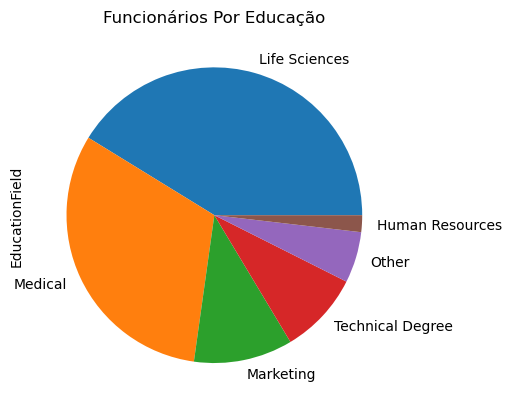

In [11]:
_= df.EducationField.value_counts().plot.pie()
_= plt.title('Funcionários Por Educação')

Analisando o gráfico de pizza, podemos identificar que boa parte do quadro de funcionários é formado na área de **"Life Sciences"**, em seguida temos a área **"Médica"** A área de formação com menos funcionários é a **"Human Resources"**

# 4- Análise BiVariável

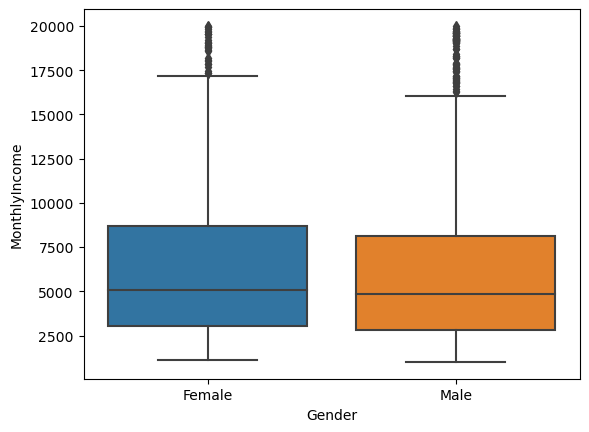

In [12]:
_= sns.boxplot(x='Gender', y='MonthlyIncome', data=df)

De forma curiosa, analisando o gráfico boxplot, podemos notar que o salário de um homem e uma mulher na IBM está bem equilibrada, pois normalmente a tendência é termos mais homens com salários altos quando comparado as mulheres. E também confirmamos a existência de possíveis outliers mencionado em outra análise com o describe e que deve ser tratado de acordo a regra de negócia de cada empresa. Nesse exemplo não farei nenhum ação nos mesmos. Mas esse seria um bom momento para validar com o gestor ou com a equipe de RH se esses salários são normais.

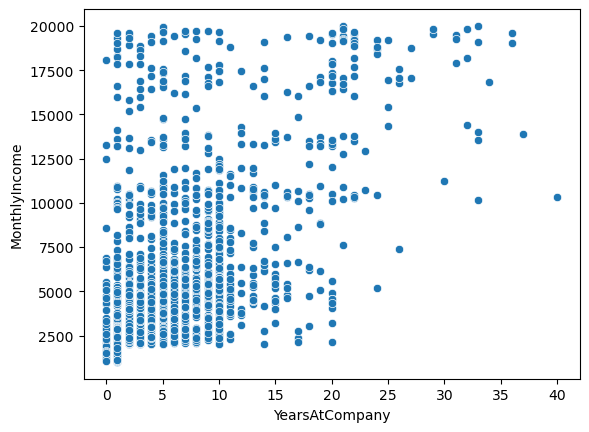

In [13]:
_= sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data=df)

Analisando as variáveis 'YearsAtCompany', e 'MonthlyIncome', aparentemente, não temos nenhuma relação clara entre o tempo de empresa e o salário do funcionário.

# 5- Análise MultiVariável

In [14]:
df.corr()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.208034,-0.010145,0.010146,0.509604,-0.004892,0.497855,0.299635,0.037510,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.021042,0.032916,-0.016075,0.005303,-0.003669,-0.017014,-0.029251,0.044872,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.021042,1.000000,0.042070,-0.027128,0.101589,-0.011296,0.094961,0.126317,0.018422,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,0.032916,0.042070,1.000000,0.017621,-0.018519,-0.046247,-0.014829,-0.001251,0.062227,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,0.017621,1.000000,0.001212,-0.006784,-0.006259,0.012594,0.003432,0.001458,0.018007,0.016194,-0.004999
JobLevel,0.509604,0.005303,0.101589,-0.018519,0.001212,1.000000,-0.001944,0.950300,0.142501,0.013984,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.046247,-0.006784,-0.001944,1.000000,-0.007157,-0.055699,0.010690,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.017014,0.094961,-0.014829,-0.006259,0.950300,-0.007157,1.000000,0.149515,0.005408,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.126317,-0.001251,0.012594,0.142501,-0.055699,0.149515,1.000000,0.030075,-0.118421,-0.090754,-0.036814,-0.110319
StockOptionLevel,0.037510,0.044872,0.018422,0.062227,0.003432,0.013984,0.010690,0.005408,0.030075,1.000000,0.015058,0.050818,0.014352,0.024698


Este dataset foi usado apenas para finalidade de estudo de análise exploratória.

Fim